In [1]:
from matplotlib import pyplot as plt
import numpy as np

# 1 - Modéle pour un seul Patient
## 1-1 Dynamique du comportement addictif sans exposition sociale

### 1-1-1 Parametres Initiaux

In [2]:
d = 0.2
q = 0.8
p = 0.5

S_max = 0.5
R_max = 7

C0 = 0
S0 = S_max
E0 = 1
lambda_0 = 0.2

m_e = 0.01         
m_lambda = 0.001

N = 260

### 1-1-2 Modélisation Numérique du comportement addictif

In [3]:
def Addiction_sans_exposition_sociale(d,q,p,S_max,R_max,lambda_0,C0,E0,m_e,m_lambda,N):
    
    h = p*S_max
    k = (p/q)*S_max
    b = 2*d/q
    
    t = np.arange(0,N+1)
    C = np.zeros(N+1)
    S = np.zeros(N+1)
    E = np.zeros(N+1)
    psi = np.zeros(N+1)
    V = np.zeros(N+1)
    A = np.zeros(N+1)
    
    C[0] = C0
    S[0] = S0
    E[0] = E0
    
    random_poisson = np.random.poisson(lambda_0)
    
    for i in range(N+1):
        psi[i] = C[i] - S[i] - E[i]
        V[i] = min(1,max(psi[i],0))
        A[i] = q*V[i] + (random_poisson/R_max)*q*(1-V[i])
        if i < N :
            C[i+1] = (1-d)*C[i] + b*min(1,1-C[i])*A[i]
            S[i+1] = S[i] + p*max(0,S_max - S[i]) -h*C[i] -k*A[i]
            E[i+1] = E[i] - m_e
    return t,C,S,E,V,A


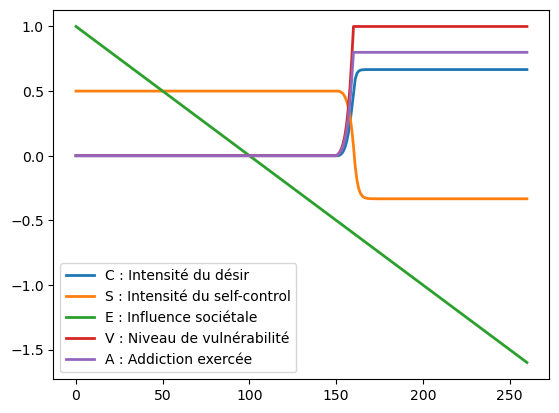

In [4]:
t,C_ses,S_ses,E_ses,V_ses,A_ses = Addiction_sans_exposition_sociale(d,q,p,S_max,R_max,lambda_0,C0,E0,m_e,m_lambda,N)
plt.plot(t,C_ses,label="C : Intensité du désir ", lw=2)
plt.plot(t,S_ses,label="S : Intensité du self-control", lw=2)
plt.plot(t,E_ses,label="E : Influence sociétale", lw=2)
plt.plot(t,V_ses,label="V : Niveau de vulnérabilité", lw=2)
plt.plot(t,A_ses,label="A : Addiction exercée", lw=2)
plt.legend()

## 1-2 Dynamique du comportement addictif avec expostion sociale

### 1-2-1 Paramétres Initiaux

##### On garde les meme parametres initiaux que pour le cas sans exposition sociale

### 1-2-2 Modélisation Numérique du comportement Addictif

In [5]:
def Addiction_avec_exposition_sociale(d,q,p,S_max,R_max,lambda_0,C0,E0,m_e,m_lambda,N):
    
    h = p*S_max
    k = (p/q)*S_max
    b = 2*d/q
    
    t = np.arange(0,N+1)
    C = np.zeros(N+1)
    S = np.zeros(N+1)
    E = np.zeros(N+1)
    psi = np.zeros(N+1)
    V = np.zeros(N+1)
    A = np.zeros(N+1)
    
    random_poisson = np.zeros(N+1)
    
    C[0] = C0
    S[0] = S0
    E[0] = E0
    
    for i in range(N+1):
        psi[i] = C[i] - S[i] - E[i]
        V[i] = min(1,max(psi[i],0))
        random_poisson[i] = np.random.poisson(lambda_0)
        A[i] = q*V[i] + (random_poisson[i]/R_max)*q*(1-V[i])
        if i < N :
            C[i+1] = (1-d)*C[i] + b*min(1,1-C[i])*A[i]
            S[i+1] = S[i] + p*max(0,S_max - S[i]) -h*C[i] -k*A[i]
            E[i+1] = E[i] - m_e

    return t,C,S,E,V,A

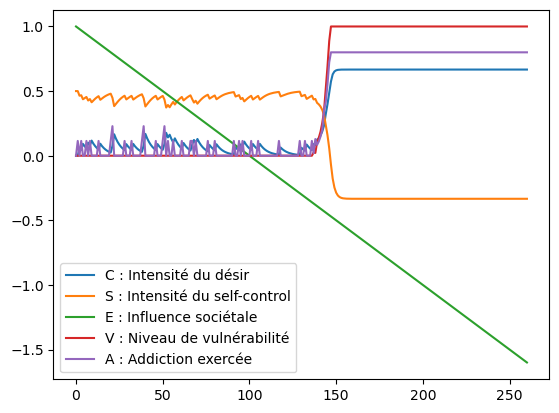

In [6]:
t,C_aes,S_aes,E_aes,V_aes,A_aes = Addiction_avec_exposition_sociale(d,q,p,S_max,R_max,lambda_0,C0,E0,m_e,m_lambda,N)
plt.plot(t,C_aes,label="C : Intensité du désir ")
plt.plot(t,S_aes,label="S : Intensité du self-control")
plt.plot(t,E_aes,label="E : Influence sociétale")
plt.plot(t,V_aes,label="V : Niveau de vulnérabilité")
plt.plot(t,A_aes,label="A : Addiction exercée")
plt.legend()

## 1-3 Evolution en fonction de thérapie de renforcement cognitif

#### On vous presente des graphes qui mettent en lumiére l'evolution du comportement addictif en faiasant varier le paramétre de therapie (p) , pour étudier plus en détail cette evolution , vous pouvez utilisez notre interface graphique qu'on vous a présenté 

### 1-3-1 Paramétres Initiaux

In [7]:
d = 0.2
q = 0.8
p1,p2,p3 = 0.8,0.5,0.2

S_max = 0.5
R_max = 7

C0_1,C0_2,C0_3 = 0,-0.3,0.7
S0_1,S0_2,S0_3 = S_max , 0.1 , -0.35
E0_1,E0_2,E0_3 = 1,0.5,0.0255
lambda_0_1,lambda_0_2,lambda_0_3 = 0.2,0.4,0.2

m_e_1,m_e_2,m_e_3 = 0.01,0.005,0         

N = 260

### 1-3-2 Evolution de l'addiction avec therapie sans exposition sociale

In [8]:
t,C_g11,S_g11,E_g11,V_g11,A_g11 = Addiction_sans_exposition_sociale(d,q,p1,S_max,R_max,lambda_0_1,C0_1,E0_1,m_e_1,m_lambda,N)
t,C_g12,S_g12,E_g12,V_g12,A_g12 = Addiction_sans_exposition_sociale(d,q,p2,S_max,R_max,lambda_0_1,C0_1,E0_1,m_e_1,m_lambda,N)
t,C_g13,S_g13,E_g13,V_g13,A_g13 = Addiction_sans_exposition_sociale(d,q,p3,S_max,R_max,lambda_0_1,C0_1,E0_1,m_e_1,m_lambda,N)

t,C_g21,S_g21,E_g21,V_g21,A_g21 = Addiction_sans_exposition_sociale(d,q,p1,S_max,R_max,lambda_0_2,C0_2,E0_2,m_e_2,m_lambda,N)
t,C_g22,S_g22,E_g22,V_g22,A_g22 = Addiction_sans_exposition_sociale(d,q,p2,S_max,R_max,lambda_0_2,C0_2,E0_2,m_e_2,m_lambda,N)
t,C_g23,S_g23,E_g23,V_g23,A_g23 = Addiction_sans_exposition_sociale(d,q,p3,S_max,R_max,lambda_0_2,C0_2,E0_2,m_e_2,m_lambda,N)

t,C_g31,S_g31,E_g31,V_g31,A_g31 = Addiction_sans_exposition_sociale(d,q,p1,S_max,R_max,lambda_0_3,C0_3,E0_3,m_e_3,m_lambda,N)
t,C_g32,S_g32,E_g32,V_g32,A_g32 = Addiction_sans_exposition_sociale(d,q,p2,S_max,R_max,lambda_0_3,C0_3,E0_3,m_e_3,m_lambda,N)
t,C_g33,S_g33,E_g33,V_g33,A_g33 = Addiction_sans_exposition_sociale(d,q,p3,S_max,R_max,lambda_0_3,C0_3,E0_3,m_e_3,m_lambda,N)

#### Dans les graphes suivant on etudie l'evolution de l'addiction en faisant varier le parametre p 
##### Premiére Colonnes de graphe : p = 0.8 , Seconde Colonnes de graphe : p = 0.5 , Troisieme Colonnes de graphe : p = 0.2
#### Premiere ligne : C0 = 0 ; S0 = 0.5 ; E0 = 1 ; lambda_0 = 0.2 ; m_e = 0.01
#### Seconde ligne : C0 = -0.3 ; S0 = 0.1 ; E0 = 0.5 ; lambda_0 = 0.4 ; m_e = 0.005
#### Troisieme ligne : C0 = 0.7 ; S0 = -0.35 ; E0 = 0.0255 ; lambda_0 = 0.2 ; m_e = 0
##### Legende : Bleu -> C : Intensité du désir
##### Legende : Orange -> S : Intensité du self-control
##### Legende : Vert -> E : Influence Sociétale
##### Legende : Rouge -> V : Niveau de Vulnerabilité
##### Legende : Violet -> A : Addiction exercéé

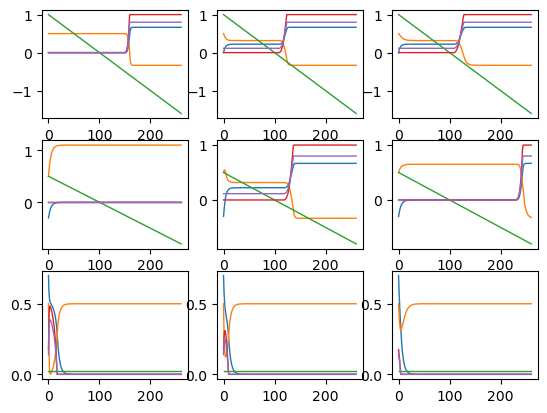

In [9]:
fig, ax = plt.subplots(3,3)

ax[0, 0].plot(t,C_g11,label="C : Intensité du désir ",lw=1)
ax[0, 0].plot(t,S_g11,label="S : Intensité du self-control",lw=1)
ax[0, 0].plot(t,E_g11,label="E : Influence sociétale",lw=1)
ax[0, 0].plot(t,V_g11,label="V : Niveau de vulnérabilité",lw=1)
ax[0, 0].plot(t,A_g11,label="A : Addiction exercée",lw=1)


ax[0, 1].plot(t,C_g12,label="C : Intensité du désir ",lw=1)
ax[0, 1].plot(t,S_g12,label="S : Intensité du self-control",lw=1)
ax[0, 1].plot(t,E_g12,label="E : Influence sociétale",lw=1)
ax[0, 1].plot(t,V_g12,label="V : Niveau de vulnérabilité",lw=1)
ax[0, 1].plot(t,A_g12,label="A : Addiction exercée",lw=1)


ax[0, 2].plot(t,C_g13,label="C : Intensité du désir ",lw=1)
ax[0, 2].plot(t,S_g13,label="S : Intensité du self-control",lw=1)
ax[0, 2].plot(t,E_g13,label="E : Influence sociétale",lw=1)
ax[0, 2].plot(t,V_g13,label="V : Niveau de vulnérabilité",lw=1)
ax[0, 2].plot(t,A_g13,label="A : Addiction exercée",lw=1)


ax[1, 0].plot(t,C_g21,label="C : Intensité du désir ",lw=1)
ax[1, 0].plot(t,S_g21,label="S : Intensité du self-control",lw=1)
ax[1, 0].plot(t,E_g21,label="E : Influence sociétale",lw=1)
ax[1, 0].plot(t,V_g21,label="V : Niveau de vulnérabilité",lw=1)
ax[1, 0].plot(t,A_g21,label="A : Addiction exercée",lw=1)


ax[1, 1].plot(t,C_g22,label="C : Intensité du désir ",lw=1)
ax[1, 1].plot(t,S_g22,label="S : Intensité du self-control",lw=1)
ax[1, 1].plot(t,E_g22,label="E : Influence sociétale",lw=1)
ax[1, 1].plot(t,V_g22,label="V : Niveau de vulnérabilité",lw=1)
ax[1, 1].plot(t,A_g22,label="A : Addiction exercée",lw=1)


ax[1, 2].plot(t,C_g23,label="C : Intensité du désir ",lw=1)
ax[1, 2].plot(t,S_g23,label="S : Intensité du self-control",lw=1)
ax[1, 2].plot(t,E_g23,label="E : Influence sociétale",lw=1)
ax[1, 2].plot(t,V_g23,label="V : Niveau de vulnérabilité",lw=1)
ax[1, 2].plot(t,A_g23,label="A : Addiction exercée",lw=1)


ax[2, 0].plot(t,C_g31,label="C : Intensité du désir ",lw=1)
ax[2, 0].plot(t,S_g31,label="S : Intensité du self-control",lw=1)
ax[2, 0].plot(t,E_g31,label="E : Influence sociétale",lw=1)
ax[2, 0].plot(t,V_g31,label="V : Niveau de vulnérabilité",lw=1)
ax[2, 0].plot(t,A_g31,label="A : Addiction exercée",lw=1)


ax[2, 1].plot(t,C_g32,label="C : Intensité du désir ",lw=1)
ax[2, 1].plot(t,S_g32,label="S : Intensité du self-control",lw=1)
ax[2, 1].plot(t,E_g32,label="E : Influence sociétale",lw=1)
ax[2, 1].plot(t,V_g32,label="V : Niveau de vulnérabilité",lw=1)
ax[2, 1].plot(t,A_g32,label="A : Addiction exercée",lw=1)


ax[2, 2].plot(t,C_g33,label="C : Intensité du désir ",lw=1)
ax[2, 2].plot(t,S_g33,label="S : Intensité du self-control",lw=1)
ax[2, 2].plot(t,E_g33,label="E : Influence sociétale",lw=1)
ax[2, 2].plot(t,V_g33,label="V : Niveau de vulnérabilité",lw=1)
ax[2, 2].plot(t,A_g33,label="A : Addiction exercée",lw=1)


### 1-3-3 Evolution de l'addiction avec therapie avec exposition sociale

In [10]:
t,C_g11,S_g11,E_g11,V_g11,A_g11 = Addiction_avec_exposition_sociale(d,q,p1,S_max,R_max,lambda_0_1,C0_1,E0_1,m_e_1,m_lambda,N)
t,C_g12,S_g12,E_g12,V_g12,A_g12 = Addiction_avec_exposition_sociale(d,q,p2,S_max,R_max,lambda_0_1,C0_1,E0_1,m_e_1,m_lambda,N)
t,C_g13,S_g13,E_g13,V_g13,A_g13 = Addiction_avec_exposition_sociale(d,q,p3,S_max,R_max,lambda_0_1,C0_1,E0_1,m_e_1,m_lambda,N)

t,C_g21,S_g21,E_g21,V_g21,A_g21 = Addiction_avec_exposition_sociale(d,q,p1,S_max,R_max,lambda_0_2,C0_2,E0_2,m_e_2,m_lambda,N)
t,C_g22,S_g22,E_g22,V_g22,A_g22 = Addiction_avec_exposition_sociale(d,q,p2,S_max,R_max,lambda_0_2,C0_2,E0_2,m_e_2,m_lambda,N)
t,C_g23,S_g23,E_g23,V_g23,A_g23 = Addiction_avec_exposition_sociale(d,q,p3,S_max,R_max,lambda_0_2,C0_2,E0_2,m_e_2,m_lambda,N)

t,C_g31,S_g31,E_g31,V_g31,A_g31 = Addiction_avec_exposition_sociale(d,q,p1,S_max,R_max,lambda_0_3,C0_3,E0_3,m_e_3,m_lambda,N)
t,C_g32,S_g32,E_g32,V_g32,A_g32 = Addiction_avec_exposition_sociale(d,q,p2,S_max,R_max,lambda_0_3,C0_3,E0_3,m_e_3,m_lambda,N)
t,C_g33,S_g33,E_g33,V_g33,A_g33 = Addiction_avec_exposition_sociale(d,q,p3,S_max,R_max,lambda_0_3,C0_3,E0_3,m_e_3,m_lambda,N)

#### Dans les graphes suivant on etudie l'evolution de l'addiction en faisant varier le parametre p 
##### Premiére Colonnes de graphe : p = 0.8 , Seconde Colonnes de graphe : p = 0.5 , Troisieme Colonnes de graphe : p = 0.2
#### Premiere ligne : C0 = 0 ; S0 = 0.5 ; E0 = 1 ; lambda_0 = 0.2 ; m_e = 0.01
#### Seconde ligne : C0 = -0.3 ; S0 = 0.1 ; E0 = 0.5 ; lambda_0 = 0.4 ; m_e = 0.005
#### Troisieme ligne : C0 = 0.7 ; S0 = -0.35 ; E0 = 0.0255 ; lambda_0 = 0.2 ; m_e = 0
##### Legende : Bleu -> C : Intensité du désir
##### Legende : Orange -> S : Intensité du self-control
##### Legende : Vert -> E : Influence Sociétale
##### Legende : Rouge -> V : Niveau de Vulnerabilité
##### Legende : Violet -> A : Addiction exercéé

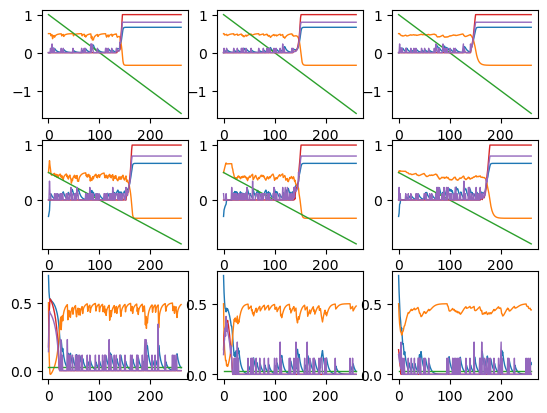

In [11]:
fig, ax = plt.subplots(3,3)

ax[0, 0].plot(t,C_g11,label="C : Intensité du désir ",lw=1)
ax[0, 0].plot(t,S_g11,label="S : Intensité du self-control",lw=1)
ax[0, 0].plot(t,E_g11,label="E : Influence sociétale",lw=1)
ax[0, 0].plot(t,V_g11,label="V : Niveau de vulnérabilité",lw=1)
ax[0, 0].plot(t,A_g11,label="A : Addiction exercée",lw=1)


ax[0, 1].plot(t,C_g12,label="C : Intensité du désir ",lw=1)
ax[0, 1].plot(t,S_g12,label="S : Intensité du self-control",lw=1)
ax[0, 1].plot(t,E_g12,label="E : Influence sociétale",lw=1)
ax[0, 1].plot(t,V_g12,label="V : Niveau de vulnérabilité",lw=1)
ax[0, 1].plot(t,A_g12,label="A : Addiction exercée",lw=1)


ax[0, 2].plot(t,C_g13,label="C : Intensité du désir ",lw=1)
ax[0, 2].plot(t,S_g13,label="S : Intensité du self-control",lw=1)
ax[0, 2].plot(t,E_g13,label="E : Influence sociétale",lw=1)
ax[0, 2].plot(t,V_g13,label="V : Niveau de vulnérabilité",lw=1)
ax[0, 2].plot(t,A_g13,label="A : Addiction exercée",lw=1)


ax[1, 0].plot(t,C_g21,label="C : Intensité du désir ",lw=1)
ax[1, 0].plot(t,S_g21,label="S : Intensité du self-control",lw=1)
ax[1, 0].plot(t,E_g21,label="E : Influence sociétale",lw=1)
ax[1, 0].plot(t,V_g21,label="V : Niveau de vulnérabilité",lw=1)
ax[1, 0].plot(t,A_g21,label="A : Addiction exercée",lw=1)


ax[1, 1].plot(t,C_g22,label="C : Intensité du désir ",lw=1)
ax[1, 1].plot(t,S_g22,label="S : Intensité du self-control",lw=1)
ax[1, 1].plot(t,E_g22,label="E : Influence sociétale",lw=1)
ax[1, 1].plot(t,V_g22,label="V : Niveau de vulnérabilité",lw=1)
ax[1, 1].plot(t,A_g22,label="A : Addiction exercée",lw=1)


ax[1, 2].plot(t,C_g23,label="C : Intensité du désir ",lw=1)
ax[1, 2].plot(t,S_g23,label="S : Intensité du self-control",lw=1)
ax[1, 2].plot(t,E_g23,label="E : Influence sociétale",lw=1)
ax[1, 2].plot(t,V_g23,label="V : Niveau de vulnérabilité",lw=1)
ax[1, 2].plot(t,A_g23,label="A : Addiction exercée",lw=1)


ax[2, 0].plot(t,C_g31,label="C : Intensité du désir ",lw=1)
ax[2, 0].plot(t,S_g31,label="S : Intensité du self-control",lw=1)
ax[2, 0].plot(t,E_g31,label="E : Influence sociétale",lw=1)
ax[2, 0].plot(t,V_g31,label="V : Niveau de vulnérabilité",lw=1)
ax[2, 0].plot(t,A_g31,label="A : Addiction exercée",lw=1)


ax[2, 1].plot(t,C_g32,label="C : Intensité du désir ",lw=1)
ax[2, 1].plot(t,S_g32,label="S : Intensité du self-control",lw=1)
ax[2, 1].plot(t,E_g32,label="E : Influence sociétale",lw=1)
ax[2, 1].plot(t,V_g32,label="V : Niveau de vulnérabilité",lw=1)
ax[2, 1].plot(t,A_g32,label="A : Addiction exercée",lw=1)


ax[2, 2].plot(t,C_g33,label="C : Intensité du désir ",lw=1)
ax[2, 2].plot(t,S_g33,label="S : Intensité du self-control",lw=1)
ax[2, 2].plot(t,E_g33,label="E : Influence sociétale",lw=1)
ax[2, 2].plot(t,V_g33,label="V : Niveau de vulnérabilité",lw=1)
ax[2, 2].plot(t,A_g33,label="A : Addiction exercée",lw=1)


## 1-4 Evolution en fonction de l'exposition aux occasions sociales

### 1-4-1 Paramétres Initiaux

In [12]:
d = 0.2
q = 0.8
p1,p2,p3 = 0.4,0.5,0.6

S_max = 0.5
R_max = 7

C0_1,C0_2,C0_3 = 0,-0.3,0.7
S0_1,S0_2,S0_3 = S_max , 0.1 , -0.35
E0_1,E0_2,E0_3 = 1,-0.545085,0.0255
lambda_0_1,lambda_0_2,lambda_0_3 = 0.2,0.5,0.9

m_e_1,m_e_2,m_e_3 = 0.01,-0.005,0         

N = 260

### 1-4-2 Evolution de l'addiction en fonction de l'exposition aux occasion sociales sans exposition sociales

In [13]:
t,C_gg11,S_gg11,E_gg11,V_gg11,A_gg11 = Addiction_sans_exposition_sociale(d,q,p1,S_max,R_max,lambda_0_1,C0_1,E0_1,m_e_1,m_lambda,N)
t,C_gg12,S_gg12,E_gg12,V_gg12,A_gg12 = Addiction_sans_exposition_sociale(d,q,p1,S_max,R_max,lambda_0_2,C0_1,E0_1,m_e_1,m_lambda,N)
t,C_gg13,S_gg13,E_gg13,V_gg13,A_gg13 = Addiction_sans_exposition_sociale(d,q,p1,S_max,R_max,lambda_0_3,C0_1,E0_1,m_e_1,m_lambda,N)

t,C_gg21,S_gg21,E_gg21,V_gg21,A_gg21 = Addiction_sans_exposition_sociale(d,q,p2,S_max,R_max,lambda_0_1,C0_2,E0_2,m_e_2,m_lambda,N)
t,C_gg22,S_gg22,E_gg22,V_gg22,A_gg22 = Addiction_sans_exposition_sociale(d,q,p2,S_max,R_max,lambda_0_2,C0_2,E0_2,m_e_2,m_lambda,N)
t,C_gg23,S_gg23,E_gg23,V_gg23,A_gg23 = Addiction_sans_exposition_sociale(d,q,p2,S_max,R_max,lambda_0_3,C0_2,E0_2,m_e_2,m_lambda,N)

t,C_gg31,S_gg31,E_gg31,V_gg31,A_gg31 = Addiction_sans_exposition_sociale(d,q,p3,S_max,R_max,lambda_0_1,C0_3,E0_3,m_e_3,m_lambda,N)
t,C_gg32,S_gg32,E_gg32,V_gg32,A_gg32 = Addiction_sans_exposition_sociale(d,q,p3,S_max,R_max,lambda_0_2,C0_3,E0_3,m_e_3,m_lambda,N)
t,C_gg33,S_gg33,E_gg33,V_gg33,A_gg33 = Addiction_sans_exposition_sociale(d,q,p3,S_max,R_max,lambda_0_3,C0_3,E0_3,m_e_3,m_lambda,N)

#### Dans les graphes suivant on etudie l'evolution de l'addiction en faisant varier le parametre lambda_0 
##### Premiére Colonnes de graphe : lambda_0 = 0.2 , Seconde Colonnes de graphe : lambda_0 = 0.5 , Troisieme Colonnes de graphe : lambda_0 = 0.9
#### Premiere ligne : C0 = 0 ; S0 = 0.5 ; E0 = 1 ; p = 0.4 ; m_e = 0.01
#### Seconde ligne : C0 = -0.3 ; S0 = 0.1 ; E0 = -0.545085 ; p = 0.5 ; m_e = -0.005
#### Troisieme ligne : C0 = 0.7 ; S0 = -0.35 ; E0 = 0.0255 ; p = 0.6 ; m_e = 0
##### Legende : Bleu -> C : Intensité du désir
##### Legende : Orange -> S : Intensité du self-control
##### Legende : Vert -> E : Influence Sociétale
##### Legende : Rouge -> V : Niveau de Vulnerabilité
##### Legende : Violet -> A : Addiction exercéé

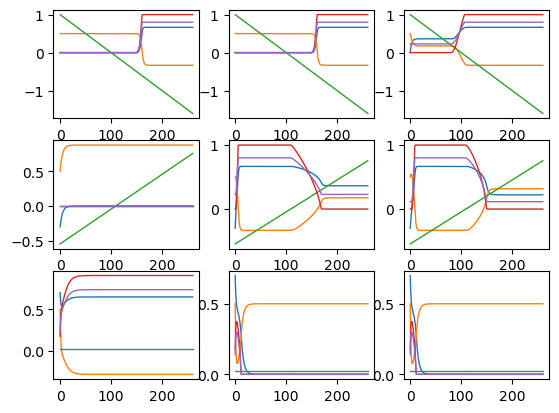

In [14]:
fig, ax = plt.subplots(3,3)

ax[0, 0].plot(t,C_gg11,label="C : Intensité du désir ",lw=1)
ax[0, 0].plot(t,S_gg11,label="S : Intensité du self-control",lw=1)
ax[0, 0].plot(t,E_gg11,label="E : Influence sociétale",lw=1)
ax[0, 0].plot(t,V_gg11,label="V : Niveau de vulnérabilité",lw=1)
ax[0, 0].plot(t,A_gg11,label="A : Addiction exercée",lw=1)


ax[0, 1].plot(t,C_gg12,label="C : Intensité du désir ",lw=1)
ax[0, 1].plot(t,S_gg12,label="S : Intensité du self-control",lw=1)
ax[0, 1].plot(t,E_gg12,label="E : Influence sociétale",lw=1)
ax[0, 1].plot(t,V_gg12,label="V : Niveau de vulnérabilité",lw=1)
ax[0, 1].plot(t,A_gg12,label="A : Addiction exercée",lw=1)


ax[0, 2].plot(t,C_gg13,label="C : Intensité du désir ",lw=1)
ax[0, 2].plot(t,S_gg13,label="S : Intensité du self-control",lw=1)
ax[0, 2].plot(t,E_gg13,label="E : Influence sociétale",lw=1)
ax[0, 2].plot(t,V_gg13,label="V : Niveau de vulnérabilité",lw=1)
ax[0, 2].plot(t,A_gg13,label="A : Addiction exercée",lw=1)


ax[1, 0].plot(t,C_gg21,label="C : Intensité du désir ",lw=1)
ax[1, 0].plot(t,S_gg21,label="S : Intensité du self-control",lw=1)
ax[1, 0].plot(t,E_gg21,label="E : Influence sociétale",lw=1)
ax[1, 0].plot(t,V_gg21,label="V : Niveau de vulnérabilité",lw=1)
ax[1, 0].plot(t,A_gg21,label="A : Addiction exercée",lw=1)


ax[1, 1].plot(t,C_gg22,label="C : Intensité du désir ",lw=1)
ax[1, 1].plot(t,S_gg22,label="S : Intensité du self-control",lw=1)
ax[1, 1].plot(t,E_gg22,label="E : Influence sociétale",lw=1)
ax[1, 1].plot(t,V_gg22,label="V : Niveau de vulnérabilité",lw=1)
ax[1, 1].plot(t,A_gg22,label="A : Addiction exercée",lw=1)


ax[1, 2].plot(t,C_gg23,label="C : Intensité du désir ",lw=1)
ax[1, 2].plot(t,S_gg23,label="S : Intensité du self-control",lw=1)
ax[1, 2].plot(t,E_gg23,label="E : Influence sociétale",lw=1)
ax[1, 2].plot(t,V_gg23,label="V : Niveau de vulnérabilité",lw=1)
ax[1, 2].plot(t,A_gg23,label="A : Addiction exercée",lw=1)


ax[2, 0].plot(t,C_gg31,label="C : Intensité du désir ",lw=1)
ax[2, 0].plot(t,S_gg31,label="S : Intensité du self-control",lw=1)
ax[2, 0].plot(t,E_gg31,label="E : Influence sociétale",lw=1)
ax[2, 0].plot(t,V_gg31,label="V : Niveau de vulnérabilité",lw=1)
ax[2, 0].plot(t,A_gg31,label="A : Addiction exercée",lw=1)


ax[2, 1].plot(t,C_gg32,label="C : Intensité du désir ",lw=1)
ax[2, 1].plot(t,S_gg32,label="S : Intensité du self-control",lw=1)
ax[2, 1].plot(t,E_gg32,label="E : Influence sociétale",lw=1)
ax[2, 1].plot(t,V_gg32,label="V : Niveau de vulnérabilité",lw=1)
ax[2, 1].plot(t,A_gg32,label="A : Addiction exercée",lw=1)


ax[2, 2].plot(t,C_gg33,label="C : Intensité du désir ",lw=1)
ax[2, 2].plot(t,S_gg33,label="S : Intensité du self-control",lw=1)
ax[2, 2].plot(t,E_gg33,label="E : Influence sociétale",lw=1)
ax[2, 2].plot(t,V_gg33,label="V : Niveau de vulnérabilité",lw=1)
ax[2, 2].plot(t,A_gg33,label="A : Addiction exercée",lw=1)


### 1-4-3 Evolution de l'addiction en fonction de l'exposition aux occasion sociales avec exposition sociales

In [15]:
t,C_gg11,S_gg11,E_gg11,V_gg11,A_gg11 = Addiction_avec_exposition_sociale(d,q,p1,S_max,R_max,lambda_0_1,C0_1,E0_1,m_e_1,m_lambda,N)
t,C_gg12,S_gg12,E_gg12,V_gg12,A_gg12 = Addiction_avec_exposition_sociale(d,q,p1,S_max,R_max,lambda_0_2,C0_1,E0_1,m_e_1,m_lambda,N)
t,C_gg13,S_gg13,E_gg13,V_gg13,A_gg13 = Addiction_avec_exposition_sociale(d,q,p1,S_max,R_max,lambda_0_3,C0_1,E0_1,m_e_1,m_lambda,N)

t,C_gg21,S_gg21,E_gg21,V_gg21,A_gg21 = Addiction_avec_exposition_sociale(d,q,p2,S_max,R_max,lambda_0_1,C0_2,E0_2,m_e_2,m_lambda,N)
t,C_gg22,S_gg22,E_gg22,V_gg22,A_gg22 = Addiction_avec_exposition_sociale(d,q,p2,S_max,R_max,lambda_0_2,C0_2,E0_2,m_e_2,m_lambda,N)
t,C_gg23,S_gg23,E_gg23,V_gg23,A_gg23 = Addiction_avec_exposition_sociale(d,q,p2,S_max,R_max,lambda_0_3,C0_2,E0_2,m_e_2,m_lambda,N)

t,C_gg31,S_gg31,E_gg31,V_gg31,A_gg31 = Addiction_avec_exposition_sociale(d,q,p3,S_max,R_max,lambda_0_1,C0_3,E0_3,m_e_3,m_lambda,N)
t,C_gg32,S_gg32,E_gg32,V_gg32,A_gg32 = Addiction_avec_exposition_sociale(d,q,p3,S_max,R_max,lambda_0_2,C0_3,E0_3,m_e_3,m_lambda,N)
t,C_gg33,S_gg33,E_gg33,V_gg33,A_gg33 = Addiction_avec_exposition_sociale(d,q,p3,S_max,R_max,lambda_0_3,C0_3,E0_3,m_e_3,m_lambda,N)

#### Dans les graphes suivant on etudie l'evolution de l'addiction en faisant varier le parametre lambda_0 
##### Premiére Colonnes de graphe : lambda_0 = 0.2 , Seconde Colonnes de graphe : lambda_0 = 0.5 , Troisieme Colonnes de graphe : lambda_0 = 0.9
#### Premiere ligne : C0 = 0 ; S0 = 0.5 ; E0 = 1 ; p = 0.4 ; m_e = 0.01
#### Seconde ligne : C0 = -0.3 ; S0 = 0.1 ; E0 = -0.545085 ; p = 0.5 ; m_e = -0.005
#### Troisieme ligne : C0 = 0.7 ; S0 = -0.35 ; E0 = 0.0255 ; p = 0.6 ; m_e = 0
##### Legende : Bleu -> C : Intensité du désir
##### Legende : Orange -> S : Intensité du self-control
##### Legende : Vert -> E : Influence Sociétale
##### Legende : Rouge -> V : Niveau de Vulnerabilité
##### Legende : Violet -> A : Addiction exercéé

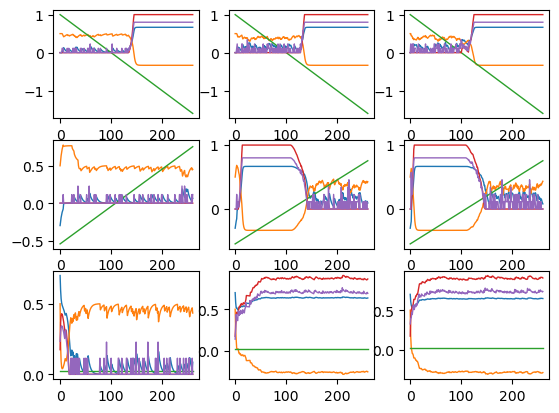

In [16]:
fig, ax = plt.subplots(3,3)

ax[0, 0].plot(t,C_gg11,label="C : Intensité du désir ",lw=1)
ax[0, 0].plot(t,S_gg11,label="S : Intensité du self-control",lw=1)
ax[0, 0].plot(t,E_gg11,label="E : Influence sociétale",lw=1)
ax[0, 0].plot(t,V_gg11,label="V : Niveau de vulnérabilité",lw=1)
ax[0, 0].plot(t,A_gg11,label="A : Addiction exercée",lw=1)


ax[0, 1].plot(t,C_gg12,label="C : Intensité du désir ",lw=1)
ax[0, 1].plot(t,S_gg12,label="S : Intensité du self-control",lw=1)
ax[0, 1].plot(t,E_gg12,label="E : Influence sociétale",lw=1)
ax[0, 1].plot(t,V_gg12,label="V : Niveau de vulnérabilité",lw=1)
ax[0, 1].plot(t,A_gg12,label="A : Addiction exercée",lw=1)


ax[0, 2].plot(t,C_gg13,label="C : Intensité du désir ",lw=1)
ax[0, 2].plot(t,S_gg13,label="S : Intensité du self-control",lw=1)
ax[0, 2].plot(t,E_gg13,label="E : Influence sociétale",lw=1)
ax[0, 2].plot(t,V_gg13,label="V : Niveau de vulnérabilité",lw=1)
ax[0, 2].plot(t,A_gg13,label="A : Addiction exercée",lw=1)


ax[1, 0].plot(t,C_gg21,label="C : Intensité du désir ",lw=1)
ax[1, 0].plot(t,S_gg21,label="S : Intensité du self-control",lw=1)
ax[1, 0].plot(t,E_gg21,label="E : Influence sociétale",lw=1)
ax[1, 0].plot(t,V_gg21,label="V : Niveau de vulnérabilité",lw=1)
ax[1, 0].plot(t,A_gg21,label="A : Addiction exercée",lw=1)


ax[1, 1].plot(t,C_gg22,label="C : Intensité du désir ",lw=1)
ax[1, 1].plot(t,S_gg22,label="S : Intensité du self-control",lw=1)
ax[1, 1].plot(t,E_gg22,label="E : Influence sociétale",lw=1)
ax[1, 1].plot(t,V_gg22,label="V : Niveau de vulnérabilité",lw=1)
ax[1, 1].plot(t,A_gg22,label="A : Addiction exercée",lw=1)


ax[1, 2].plot(t,C_gg23,label="C : Intensité du désir ",lw=1)
ax[1, 2].plot(t,S_gg23,label="S : Intensité du self-control",lw=1)
ax[1, 2].plot(t,E_gg23,label="E : Influence sociétale",lw=1)
ax[1, 2].plot(t,V_gg23,label="V : Niveau de vulnérabilité",lw=1)
ax[1, 2].plot(t,A_gg23,label="A : Addiction exercée",lw=1)


ax[2, 0].plot(t,C_gg31,label="C : Intensité du désir ",lw=1)
ax[2, 0].plot(t,S_gg31,label="S : Intensité du self-control",lw=1)
ax[2, 0].plot(t,E_gg31,label="E : Influence sociétale",lw=1)
ax[2, 0].plot(t,V_gg31,label="V : Niveau de vulnérabilité",lw=1)
ax[2, 0].plot(t,A_gg31,label="A : Addiction exercée",lw=1)


ax[2, 1].plot(t,C_gg32,label="C : Intensité du désir ",lw=1)
ax[2, 1].plot(t,S_gg32,label="S : Intensité du self-control",lw=1)
ax[2, 1].plot(t,E_gg32,label="E : Influence sociétale",lw=1)
ax[2, 1].plot(t,V_gg32,label="V : Niveau de vulnérabilité",lw=1)
ax[2, 1].plot(t,A_gg32,label="A : Addiction exercée",lw=1)


ax[2, 2].plot(t,C_gg33,label="C : Intensité du désir ",lw=1)
ax[2, 2].plot(t,S_gg33,label="S : Intensité du self-control",lw=1)
ax[2, 2].plot(t,E_gg33,label="E : Influence sociétale",lw=1)
ax[2, 2].plot(t,V_gg33,label="V : Niveau de vulnérabilité",lw=1)
ax[2, 2].plot(t,A_gg33,label="A : Addiction exercée",lw=1)


## 1-5 Evolution de l'addiction en fonction des influences exterieur

### 1-5-1 Paramétres Initiaux

In [17]:
d = 0.2
q = 0.8
p1,p2,p3 = 0.4,0.5,0.6

S_max = 0.5
R_max = 7

C0_1,C0_2,C0_3 = 0,-0.3,0.7
S0_1,S0_2,S0_3 = S_max , 0.1 , -0.35
E0_1,E0_2,E0_3 = 1,-0.545085,0.0255
lambda_0_1,lambda_0_2,lambda_0_3 = 0.2,0.5,0.9

m_e_1,m_e_2,m_e_3 = 0.001,-0.005,0.003         

N = 260

### 1-5-2 Evolution de l'addiction en fonction des influences exterieurs sans exposition sociales

In [18]:
t,C_ggg11,S_ggg11,E_ggg11,V_ggg11,A_ggg11 = Addiction_sans_exposition_sociale(d,q,p1,S_max,R_max,lambda_0_1,C0_1,E0_1,m_e_1,m_lambda,N)
t,C_ggg12,S_ggg12,E_ggg12,V_ggg12,A_ggg12 = Addiction_sans_exposition_sociale(d,q,p1,S_max,R_max,lambda_0_1,C0_1,E0_1,m_e_2,m_lambda,N)
t,C_ggg13,S_ggg13,E_ggg13,V_ggg13,A_ggg13 = Addiction_sans_exposition_sociale(d,q,p1,S_max,R_max,lambda_0_1,C0_1,E0_1,m_e_3,m_lambda,N)

t,C_ggg21,S_ggg21,E_ggg21,V_ggg21,A_ggg21 = Addiction_sans_exposition_sociale(d,q,p2,S_max,R_max,lambda_0_2,C0_2,E0_2,m_e_1,m_lambda,N)
t,C_ggg22,S_ggg22,E_ggg22,V_ggg22,A_ggg22 = Addiction_sans_exposition_sociale(d,q,p2,S_max,R_max,lambda_0_2,C0_2,E0_2,m_e_2,m_lambda,N)
t,C_ggg23,S_ggg23,E_ggg23,V_ggg23,A_ggg23 = Addiction_sans_exposition_sociale(d,q,p2,S_max,R_max,lambda_0_2,C0_2,E0_2,m_e_3,m_lambda,N)

t,C_ggg31,S_ggg31,E_ggg31,V_ggg31,A_ggg31 = Addiction_sans_exposition_sociale(d,q,p3,S_max,R_max,lambda_0_3,C0_3,E0_3,m_e_1,m_lambda,N)
t,C_ggg32,S_ggg32,E_ggg32,V_ggg32,A_ggg32 = Addiction_sans_exposition_sociale(d,q,p3,S_max,R_max,lambda_0_3,C0_3,E0_3,m_e_2,m_lambda,N)
t,C_ggg33,S_ggg33,E_ggg33,V_ggg33,A_ggg33 = Addiction_sans_exposition_sociale(d,q,p3,S_max,R_max,lambda_0_3,C0_3,E0_3,m_e_3,m_lambda,N)

#### Dans les graphes suivant on etudie l'evolution de l'addiction en faisant varier le parametre m_e 
##### Premiére Colonnes de graphe : m_e = 0.001 , Seconde Colonnes de graphe : m_e = -0.005 , Troisieme Colonnes de graphe : m_e = 0.003
#### Premiere ligne : C0 = 0 ; S0 = 0.5 ; E0 = 1 ; p = 0.4 ; lambda_0 = 0.2
#### Seconde ligne : C0 = -0.3 ; S0 = 0.1 ; E0 = -0.545085 ; p = 0.5 ; lambda_0 = 0.5
#### Troisieme ligne : C0 = 0.7 ; S0 = -0.35 ; E0 = 0.0255 ; p = 0.6 ; lambda_0 = 0.9
##### Legende : Bleu -> C : Intensité du désir
##### Legende : Orange -> S : Intensité du self-control
##### Legende : Vert -> E : Influence Sociétale
##### Legende : Rouge -> V : Niveau de Vulnerabilité
##### Legende : Violet -> A : Addiction exercéé

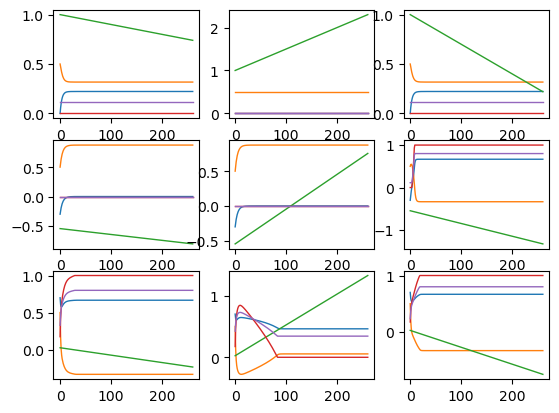

In [19]:
fig, ax = plt.subplots(3,3)

ax[0, 0].plot(t,C_ggg11,label="C : Intensité du désir ",lw=1)
ax[0, 0].plot(t,S_ggg11,label="S : Intensité du self-control",lw=1)
ax[0, 0].plot(t,E_ggg11,label="E : Influence sociétale",lw=1)
ax[0, 0].plot(t,V_ggg11,label="V : Niveau de vulnérabilité",lw=1)
ax[0, 0].plot(t,A_ggg11,label="A : Addiction exercée",lw=1)


ax[0, 1].plot(t,C_ggg12,label="C : Intensité du désir ",lw=1)
ax[0, 1].plot(t,S_ggg12,label="S : Intensité du self-control",lw=1)
ax[0, 1].plot(t,E_ggg12,label="E : Influence sociétale",lw=1)
ax[0, 1].plot(t,V_ggg12,label="V : Niveau de vulnérabilité",lw=1)
ax[0, 1].plot(t,A_ggg12,label="A : Addiction exercée",lw=1)


ax[0, 2].plot(t,C_ggg13,label="C : Intensité du désir ",lw=1)
ax[0, 2].plot(t,S_ggg13,label="S : Intensité du self-control",lw=1)
ax[0, 2].plot(t,E_ggg13,label="E : Influence sociétale",lw=1)
ax[0, 2].plot(t,V_ggg13,label="V : Niveau de vulnérabilité",lw=1)
ax[0, 2].plot(t,A_ggg13,label="A : Addiction exercée",lw=1)


ax[1, 0].plot(t,C_ggg21,label="C : Intensité du désir ",lw=1)
ax[1, 0].plot(t,S_ggg21,label="S : Intensité du self-control",lw=1)
ax[1, 0].plot(t,E_ggg21,label="E : Influence sociétale",lw=1)
ax[1, 0].plot(t,V_ggg21,label="V : Niveau de vulnérabilité",lw=1)
ax[1, 0].plot(t,A_ggg21,label="A : Addiction exercée",lw=1)


ax[1, 1].plot(t,C_ggg22,label="C : Intensité du désir ",lw=1)
ax[1, 1].plot(t,S_ggg22,label="S : Intensité du self-control",lw=1)
ax[1, 1].plot(t,E_ggg22,label="E : Influence sociétale",lw=1)
ax[1, 1].plot(t,V_ggg22,label="V : Niveau de vulnérabilité",lw=1)
ax[1, 1].plot(t,A_ggg22,label="A : Addiction exercée",lw=1)


ax[1, 2].plot(t,C_ggg23,label="C : Intensité du désir ",lw=1)
ax[1, 2].plot(t,S_ggg23,label="S : Intensité du self-control",lw=1)
ax[1, 2].plot(t,E_ggg23,label="E : Influence sociétale",lw=1)
ax[1, 2].plot(t,V_ggg23,label="V : Niveau de vulnérabilité",lw=1)
ax[1, 2].plot(t,A_ggg23,label="A : Addiction exercée",lw=1)


ax[2, 0].plot(t,C_ggg31,label="C : Intensité du désir ",lw=1)
ax[2, 0].plot(t,S_ggg31,label="S : Intensité du self-control",lw=1)
ax[2, 0].plot(t,E_ggg31,label="E : Influence sociétale",lw=1)
ax[2, 0].plot(t,V_ggg31,label="V : Niveau de vulnérabilité",lw=1)
ax[2, 0].plot(t,A_ggg31,label="A : Addiction exercée",lw=1)


ax[2, 1].plot(t,C_ggg32,label="C : Intensité du désir ",lw=1)
ax[2, 1].plot(t,S_ggg32,label="S : Intensité du self-control",lw=1)
ax[2, 1].plot(t,E_ggg32,label="E : Influence sociétale",lw=1)
ax[2, 1].plot(t,V_ggg32,label="V : Niveau de vulnérabilité",lw=1)
ax[2, 1].plot(t,A_ggg32,label="A : Addiction exercée",lw=1)


ax[2, 2].plot(t,C_ggg33,label="C : Intensité du désir ",lw=1)
ax[2, 2].plot(t,S_ggg33,label="S : Intensité du self-control",lw=1)
ax[2, 2].plot(t,E_ggg33,label="E : Influence sociétale",lw=1)
ax[2, 2].plot(t,V_ggg33,label="V : Niveau de vulnérabilité",lw=1)
ax[2, 2].plot(t,A_ggg33,label="A : Addiction exercée",lw=1)


### 1-5-3 Evolution de l'addiction en fonction des influences exterieurs avec exposition sociales

In [20]:
t,C_ggg11,S_ggg11,E_ggg11,V_ggg11,A_ggg11 = Addiction_avec_exposition_sociale(d,q,p1,S_max,R_max,lambda_0_1,C0_1,E0_1,m_e_1,m_lambda,N)
t,C_ggg12,S_ggg12,E_ggg12,V_ggg12,A_ggg12 = Addiction_avec_exposition_sociale(d,q,p1,S_max,R_max,lambda_0_1,C0_1,E0_1,m_e_2,m_lambda,N)
t,C_ggg13,S_ggg13,E_ggg13,V_ggg13,A_ggg13 = Addiction_avec_exposition_sociale(d,q,p1,S_max,R_max,lambda_0_1,C0_1,E0_1,m_e_3,m_lambda,N)

t,C_ggg21,S_ggg21,E_ggg21,V_ggg21,A_ggg21 = Addiction_avec_exposition_sociale(d,q,p2,S_max,R_max,lambda_0_2,C0_2,E0_2,m_e_1,m_lambda,N)
t,C_ggg22,S_ggg22,E_ggg22,V_ggg22,A_ggg22 = Addiction_avec_exposition_sociale(d,q,p2,S_max,R_max,lambda_0_2,C0_2,E0_2,m_e_2,m_lambda,N)
t,C_ggg23,S_ggg23,E_ggg23,V_ggg23,A_ggg23 = Addiction_avec_exposition_sociale(d,q,p2,S_max,R_max,lambda_0_2,C0_2,E0_2,m_e_3,m_lambda,N)

t,C_ggg31,S_ggg31,E_ggg31,V_ggg31,A_ggg31 = Addiction_avec_exposition_sociale(d,q,p3,S_max,R_max,lambda_0_3,C0_3,E0_3,m_e_1,m_lambda,N)
t,C_ggg32,S_ggg32,E_ggg32,V_ggg32,A_ggg32 = Addiction_avec_exposition_sociale(d,q,p3,S_max,R_max,lambda_0_3,C0_3,E0_3,m_e_2,m_lambda,N)
t,C_ggg33,S_ggg33,E_ggg33,V_ggg33,A_ggg33 = Addiction_avec_exposition_sociale(d,q,p3,S_max,R_max,lambda_0_3,C0_3,E0_3,m_e_3,m_lambda,N)

#### Dans les graphes suivant on etudie l'evolution de l'addiction en faisant varier le parametre m_e 
##### Premiére Colonnes de graphe : m_e = 0.001 , Seconde Colonnes de graphe : m_e = -0.005 , Troisieme Colonnes de graphe : m_e = 0.003
#### Premiere ligne : C0 = 0 ; S0 = 0.5 ; E0 = 1 ; p = 0.4 ; lambda_0 = 0.2
#### Seconde ligne : C0 = -0.3 ; S0 = 0.1 ; E0 = -0.545085 ; p = 0.5 ; lambda_0 = 0.5
#### Troisieme ligne : C0 = 0.7 ; S0 = -0.35 ; E0 = 0.0255 ; p = 0.6 ; lambda_0 = 0.9
##### Legende : Bleu -> C : Intensité du désir
##### Legende : Orange -> S : Intensité du self-control
##### Legende : Vert -> E : Influence Sociétale
##### Legende : Rouge -> V : Niveau de Vulnerabilité
##### Legende : Violet -> A : Addiction exercéé

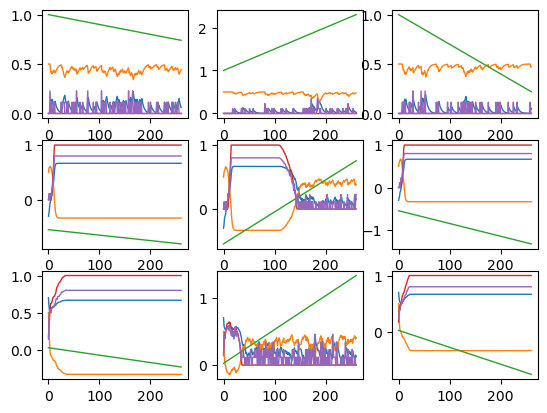

In [21]:
fig, ax = plt.subplots(3,3)

ax[0, 0].plot(t,C_ggg11,label="C : Intensité du désir ",lw=1)
ax[0, 0].plot(t,S_ggg11,label="S : Intensité du self-control",lw=1)
ax[0, 0].plot(t,E_ggg11,label="E : Influence sociétale",lw=1)
ax[0, 0].plot(t,V_ggg11,label="V : Niveau de vulnérabilité",lw=1)
ax[0, 0].plot(t,A_ggg11,label="A : Addiction exercée",lw=1)


ax[0, 1].plot(t,C_ggg12,label="C : Intensité du désir ",lw=1)
ax[0, 1].plot(t,S_ggg12,label="S : Intensité du self-control",lw=1)
ax[0, 1].plot(t,E_ggg12,label="E : Influence sociétale",lw=1)
ax[0, 1].plot(t,V_ggg12,label="V : Niveau de vulnérabilité",lw=1)
ax[0, 1].plot(t,A_ggg12,label="A : Addiction exercée",lw=1)


ax[0, 2].plot(t,C_ggg13,label="C : Intensité du désir ",lw=1)
ax[0, 2].plot(t,S_ggg13,label="S : Intensité du self-control",lw=1)
ax[0, 2].plot(t,E_ggg13,label="E : Influence sociétale",lw=1)
ax[0, 2].plot(t,V_ggg13,label="V : Niveau de vulnérabilité",lw=1)
ax[0, 2].plot(t,A_ggg13,label="A : Addiction exercée",lw=1)


ax[1, 0].plot(t,C_ggg21,label="C : Intensité du désir ",lw=1)
ax[1, 0].plot(t,S_ggg21,label="S : Intensité du self-control",lw=1)
ax[1, 0].plot(t,E_ggg21,label="E : Influence sociétale",lw=1)
ax[1, 0].plot(t,V_ggg21,label="V : Niveau de vulnérabilité",lw=1)
ax[1, 0].plot(t,A_ggg21,label="A : Addiction exercée",lw=1)


ax[1, 1].plot(t,C_ggg22,label="C : Intensité du désir ",lw=1)
ax[1, 1].plot(t,S_ggg22,label="S : Intensité du self-control",lw=1)
ax[1, 1].plot(t,E_ggg22,label="E : Influence sociétale",lw=1)
ax[1, 1].plot(t,V_ggg22,label="V : Niveau de vulnérabilité",lw=1)
ax[1, 1].plot(t,A_ggg22,label="A : Addiction exercée",lw=1)


ax[1, 2].plot(t,C_ggg23,label="C : Intensité du désir ",lw=1)
ax[1, 2].plot(t,S_ggg23,label="S : Intensité du self-control",lw=1)
ax[1, 2].plot(t,E_ggg23,label="E : Influence sociétale",lw=1)
ax[1, 2].plot(t,V_ggg23,label="V : Niveau de vulnérabilité",lw=1)
ax[1, 2].plot(t,A_ggg23,label="A : Addiction exercée",lw=1)


ax[2, 0].plot(t,C_ggg31,label="C : Intensité du désir ",lw=1)
ax[2, 0].plot(t,S_ggg31,label="S : Intensité du self-control",lw=1)
ax[2, 0].plot(t,E_ggg31,label="E : Influence sociétale",lw=1)
ax[2, 0].plot(t,V_ggg31,label="V : Niveau de vulnérabilité",lw=1)
ax[2, 0].plot(t,A_ggg31,label="A : Addiction exercée",lw=1)


ax[2, 1].plot(t,C_ggg32,label="C : Intensité du désir ",lw=1)
ax[2, 1].plot(t,S_ggg32,label="S : Intensité du self-control",lw=1)
ax[2, 1].plot(t,E_ggg32,label="E : Influence sociétale",lw=1)
ax[2, 1].plot(t,V_ggg32,label="V : Niveau de vulnérabilité",lw=1)
ax[2, 1].plot(t,A_ggg32,label="A : Addiction exercée",lw=1)


ax[2, 2].plot(t,C_ggg33,label="C : Intensité du désir ",lw=1)
ax[2, 2].plot(t,S_ggg33,label="S : Intensité du self-control",lw=1)
ax[2, 2].plot(t,E_ggg33,label="E : Influence sociétale",lw=1)
ax[2, 2].plot(t,V_ggg33,label="V : Niveau de vulnérabilité",lw=1)
ax[2, 2].plot(t,A_ggg33,label="A : Addiction exercée",lw=1)


# 2 - Modéle pour 2 patient

## 2-1 Paramétres Initiaux

In [22]:
d = 0.2
q = 0.8
p = 0.6 

S_max = 0.5
R_max = 7
E0 = 0.05

m_e = 0.0001        
m_lambda = 0
lambda_0 = 0.7

N = 260        

C0_patient1 = 0.9
C0_patient2 = -0.2
S0_patient1 = -0.7
S0_patient2 = 0.8

alpha = 0.001
beta = 0.005
gamma = 10

## 2-2 Modélisation Numérique du comportement Addictif de deux personnes qui s'influent entre elle

In [23]:
def Addiction_groupe(d,q,p,S_max,R_max,E0,m_e,m_lambda,lambda_0,C0_patient1,C0_patient2,S0_patient1,S0_patient2,alpha,beta,gamma,N):
    h = p*S_max
    k = (p/q)*S_max
    b = 2*d/q

    t = np.arange(0,N+1)

    C_patient1 = np.zeros(N+1)
    C_patient2 = np.zeros(N+1)

    S_patient1 = np.zeros(N+1)
    S_patient2 = np.zeros(N+1)

    E = np.zeros(N+1)

    psi_patient1 = np.zeros(N+1)
    psi_patient2 = np.zeros(N+1)

    V_patient1 = np.zeros(N+1)
    V_patient2 = np.zeros(N+1)

    A_patient1 = np.zeros(N+1)
    A_patient2 = np.zeros(N+1)

    P_patient1 = np.zeros(N+1)
    P_patient2 = np.zeros(N+1)

    random_poisson = np.zeros(N+1)

    C_patient1[0] = C0_patient1
    C_patient2[0] = C0_patient2

    S_patient1[0] = S0_patient1
    S_patient2[0] = S0_patient2

    E[0] = E0

    for i in range(N+1):
        psi_patient1[i] = C_patient1[i] - S_patient1[i] - E[i]
        psi_patient2[i] = C_patient2[i] - S_patient2[i] - E[i]
        V_patient1[i] = min(1,max(psi_patient1[i],0))
        V_patient2[i] = min(1,max(psi_patient2[i],0))
        random_poisson[i] = np.random.poisson(lambda_0)
        P_patient1[i] = p + beta*np.exp(-gamma*A_patient1[i])
        P_patient2[i] = p + beta*np.exp(-gamma*A_patient2[i])
        A_patient1[i] = q*V_patient1[i] + (random_poisson[i]/R_max)*q*(1-V_patient1[i])
        A_patient2[i] = q*V_patient2[i] + (random_poisson[i]/R_max)*q*(1-V_patient2[i])
        if i < N :
            C_patient1[i+1] = (1-d)*C_patient1[i] + alpha*A_patient2[i]*C_patient1[i] + b*min(1,1-C_patient1[i])*A_patient1[i]
            C_patient2[i+1] = (1-d)*C_patient2[i] + alpha*A_patient1[i]*C_patient2[i] + b*min(1,1-C_patient2[i])*A_patient2[i]
            S_patient1[i+1] = S_patient1[i] + P_patient2[i]*max(0,S_max - S_patient1[i]) - h*C_patient1[i] - k*A_patient1[i]
            S_patient2[i+1] = S_patient2[i] + P_patient1[i]*max(0,S_max - S_patient2[i]) - h*C_patient2[i] - k*A_patient2[i]
            E[i+1] = E[i] - m_e
    return t,C_patient1,C_patient2,S_patient1,S_patient2,E,V_patient1,V_patient2,A_patient1,A_patient2

In [24]:

t,C_patient1,C_patient2,S_patient1,S_patient2,E,V_patient1,V_patient2,A_patient1,A_patient2 = Addiction_groupe(d,q,p,S_max,R_max,E0,m_e,m_lambda,lambda_0,C0_patient1,C0_patient2,S0_patient1,S0_patient2,alpha,beta,gamma,N)

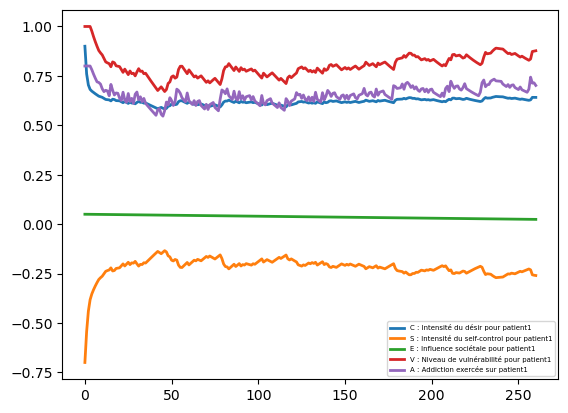

In [25]:
plt.plot(t,C_patient1,label="C : Intensité du désir pour patient1 ", lw=2)
plt.plot(t,S_patient1,label="S : Intensité du self-control pour patient1", lw=2)
plt.plot(t,E,label="E : Influence sociétale pour patient1", lw=2)
plt.plot(t,V_patient1,label="V : Niveau de vulnérabilité pour patient1", lw=2)
plt.plot(t,A_patient1,label="A : Addiction exercée sur patient1", lw=2)
plt.legend(fontsize=5
          )

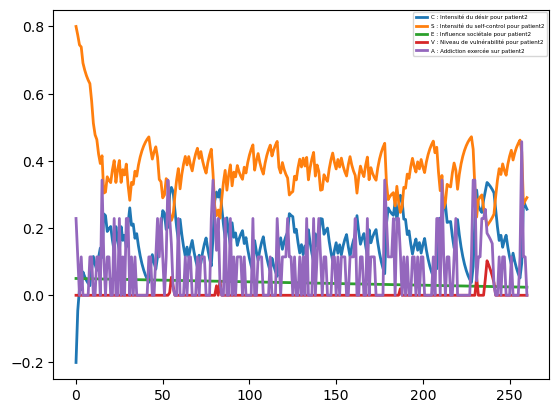

In [26]:
plt.plot(t,C_patient2,label="C : Intensité du désir pour patient2 ", lw=2)
plt.plot(t,S_patient2,label="S : Intensité du self-control pour patient2", lw=2)
plt.plot(t,E,label="E : Influence sociétale pour patient2", lw=2)
plt.plot(t,V_patient2,label="V : Niveau de vulnérabilité pour patient2", lw=2)
plt.plot(t,A_patient2,label="A : Addiction exercée sur patient2", lw=2)
plt.legend(fontsize=4)

###  Comparaison sur le meme graphe !

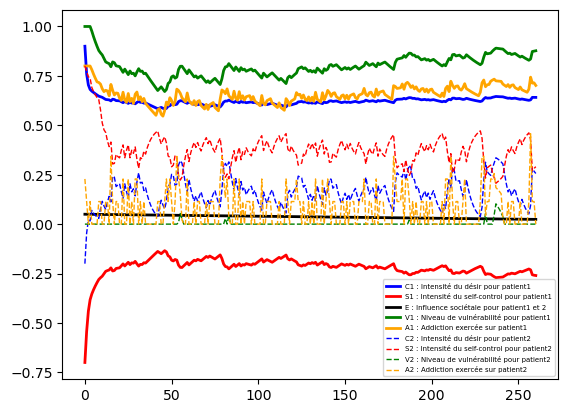

In [27]:
plt.plot(t,C_patient1,label="C1 : Intensité du désir pour patient1 ", lw=2 , color ="blue")
plt.plot(t,S_patient1,label="S1 : Intensité du self-control pour patient1", lw=2, color ="red")
plt.plot(t,E,label="E : Influence sociétale pour patient1 et 2", lw=2,color="black")
plt.plot(t,V_patient1,label="V1 : Niveau de vulnérabilité pour patient1", lw=2,color="green")
plt.plot(t,A_patient1,label="A1 : Addiction exercée sur patient1", lw=2,color="orange")
plt.plot(t,C_patient2,label="C2 : Intensité du désir pour patient2 ", lw=1 , color ="blue",linestyle="--")
plt.plot(t,S_patient2,label="S2 : Intensité du self-control pour patient2", lw=1, color ="red",linestyle="--")
plt.plot(t,V_patient2,label="V2 : Niveau de vulnérabilité pour patient2", lw=1,color="green",linestyle="--")
plt.plot(t,A_patient2,label="A2 : Addiction exercée sur patient2", lw=1,color="orange",linestyle="--")
plt.legend(fontsize=5)

# 3- Etudes du taux de Vulnèrabilité

## 3-1 - Taux de Vulnérabilité en fonction du paramétre de thérapie (p)

### 3-1-1 Paramétres Initiaux

In [28]:
d = 0.2
q = 0.8


S_max = 0.5
R_max = 7

C0 = 0.7
S0 = -0.35
E0 = 0.0255
lambda_0 = 0

m_e = 0         

N = 260

### 3-1-2 Modélisation Numérique du taux de Vulnérabilté

Text(0.5, 1.0, 'Evolution du taux de Vulnérabilté en fonction du paramétre p')

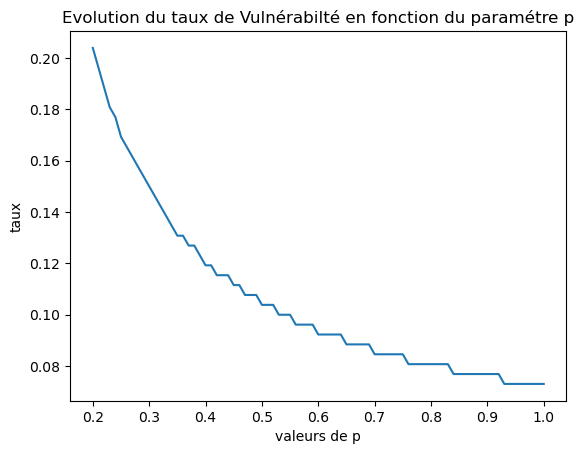

In [29]:
valeurs_p = np.arange(0.2,1.01,0.01)
resultats = []

for p in valeurs_p :
    taux = 0
    t,C,S,E,V,A = Addiction_avec_exposition_sociale(d,q,p,S_max,R_max,lambda_0,C0,E0,m_e,m_lambda,N)
    for v in V :
        if v > 0.85 :
            taux = taux + 1
    resultats.append(taux / N)

plt.plot(valeurs_p,resultats,label="Taux de Vulnérabilité")
plt.xlabel("valeurs de p")
plt.ylabel("taux")
plt.title("Evolution du taux de Vulnérabilté en fonction du paramétre p")


## 3-2 Taux de vulnérabilité en fonction du paramétre de l'exposition aux occasions sociales  (lambda_0)

### 3-2-1 Paramétres Initiaux

In [30]:
d = 0.2
q = 0.8
p = 0.6


S_max = 0.5
R_max = 7

C0 = 0.7
S0 = -0.35
E0 = -0.455
#lambda_0 = 0

m_e = -0.003         

N = 260

### 3-2-2 Modelisation Numerique du taux de Vulnérabilité

Text(0.5, 1.0, 'Evolution du taux de Vulnérabilté en fonction du paramétre lambda_0')

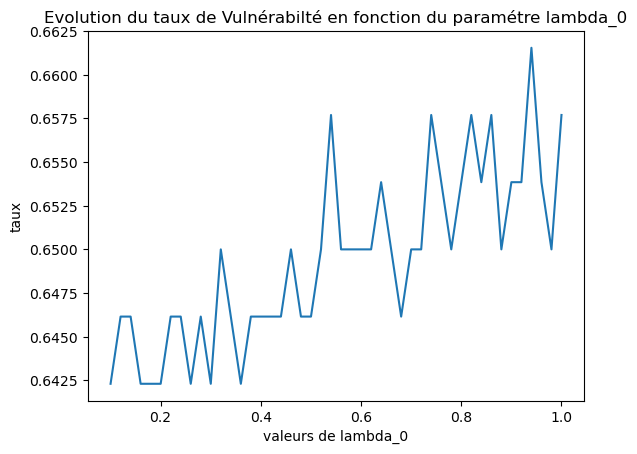

In [31]:
valeurs_lambda_0 = np.arange(1,0.098,-0.02)
resultats = []

for lambda_0 in valeurs_lambda_0 :
    taux = 0
    t,C,S,E,V,A = Addiction_avec_exposition_sociale(d,q,p,S_max,R_max,lambda_0,C0,E0,m_e,m_lambda,N)
    for v in V :
        if v > 0.85 :
            taux = taux + 1
    resultats.append(taux / N)

plt.plot(valeurs_lambda_0,resultats,label="Taux de Vulnérabilité")
plt.xlabel("valeurs de lambda_0")
plt.ylabel("taux")
plt.title("Evolution du taux de Vulnérabilté en fonction du paramétre lambda_0")